In [ ]:
 pip install transformers==2.6.0

     |████████████████████████████████| 542kB 2.8MB/s 
     |████████████████████████████████| 3.7MB 12.5MB/s 
     |████████████████████████████████| 133kB 35.7MB/s 
     |████████████████████████████████| 1.1MB 34.5MB/s 
     |████████████████████████████████| 890kB 55.8MB/s 
     |████████████████████████████████| 71kB 10.8MB/s 
     |████████████████████████████████| 6.7MB 50.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=124f454f3a85afec8e4f49a7a86bb85053f8a7f4ef07078268b7119b78f056ca
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm, trange

In [ ]:
# total_data = pd.read_csv("tsd_train.csv", encoding="latin1").fillna(method="ffill")

# df = total_data
# df['split'] = np.random.randn(df.shape[0], 1)

# msk = np.random.rand(len(df)) <= 0.9

# data = df[msk]
# # data=
# testa = df[~msk]
# data.tail(5)

In [ ]:
data = pd.read_csv("trainfinal.csv", encoding="latin1").fillna(method="ffill")
# df = total_data

data.tail(5)

spans                                               text
6346  [684, 685, 686, 687, 688, 689, 703, 704, 705, ...  As for Clinton, it's well known why Putin want...
6347            [46, 47, 48, 49, 98, 99, 100, 101, 102]  Because the author with this steaming pile of ...
6348               [11, 12, 13, 14, 15, 16, 17, 18, 19]                              Manifestly ludicrous.
6349                           [21, 22, 23, 24, 25, 26]  No need ban.  Anyone stupid enough to go to N....
6350  [276, 277, 278, 279, 280, 281, 282, 283, 284, ...  âDoes this guy have anything better to do wi...

In [ ]:
data.head(5)

spans                                               text
0                                      [7, 8, 9, 10]  Only a fool would not be against this presiden...
1  [9, 10, 11, 12, 13, 14, 15, 16, 17, 55, 56, 57...  cops are dumbasses anyways and any male from u...
2                                 [2, 3, 4, 5, 6, 7]  A stupid post by a troll.  Thanks for outing y...
3                            [5, 6, 7, 8, 9, 10, 11]  Most idiotic, heartless comment I think I've e...
4  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  Some of you might have, but if you supported H...

In [ ]:
def str_to_int(input_span):
    input_span=input_span[1:-1]
    if not input_span:
        return []
    splited_span=(input_span.split(", "))

    for i in range(len(splited_span)):
        splited_span[i]=int(splited_span[i])
    return splited_span


def split_text(input_text):
    if not input_text:
        return input_text
    splited_text=(input_text.split())
    return splited_text

def just_ret(input_text):
    return input_text

def labels_conv(input_spans,input_text,splited_text):
    if not input_spans:
        return ['0']*len(splited_text)
    every_element=np.zeros(len(input_text))
    for i in input_spans:
        every_element[i]=1;
    output_labels=['0']*len(splited_text)
    j=0
    for i in range(len(splited_text)):
        if(every_element[j]==1):
            output_labels[i]='1'
        j=j+len(splited_text[i])+1
    return output_labels

In [ ]:
data["in_spans"] = data.apply(lambda row:str_to_int(row.spans), axis=1)

data["in_text"] = data.apply(lambda row:split_text(row.text), axis=1)

data["just_text"] = data.apply(lambda row:just_ret(row.text), axis=1)

data["labels"] = data.apply(lambda row:labels_conv(row.in_spans,row.text,row.in_text), axis=1)

In [ ]:
data.head(10)

spans  ...                                             labels
0                                      [7, 8, 9, 10]  ...  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1  [9, 10, 11, 12, 13, 14, 15, 16, 17, 55, 56, 57...  ...  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
2                                 [2, 3, 4, 5, 6, 7]  ...                     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
3                            [5, 6, 7, 8, 9, 10, 11]  ...               [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  ...  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
5                           [20, 21, 22, 23, 24, 25]  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6       [15, 16, 17, 18, 19, 26, 27, 28, 29, 30, 31]  ...                              [0, 0, 0, 0, 1, 0, 1]
7                   [37, 38, 39, 40, 41, 42, 43, 44]  ...               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
8  [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 3...  ...  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
9  [29, 30, 31, 32, 33, 34, 35, 36, 37, 134, 135,...  ...  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

[10 rows x 6 columns]

In [ ]:
# arraysentences=data["in_text"]/
arraysentences=data["just_text"]
arraylabels = data["labels"]

sentences=arraysentences.to_list()
labels = arraylabels.to_list()

In [ ]:
# data["labels"][0]

In [ ]:
# tag_values = list(set(data["labels"][0]))
tag_values = ['1','0']

In [ ]:
# tag_values = list(set(data["labels"][0]))
tag_values.append("PAD")
tag2idx = {t: i for i, t in enumerate(tag_values)}
tag2idx

{'0': 1, '1': 0, 'PAD': 2}

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import RobertaTokenizer, RobertaConfig

from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

torch.__version__

'1.6.0+cu101'

In [ ]:
MAX_LEN = 100
bs = 32

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()

print(torch.cuda.get_device_name(0))
tokenizer = RobertaTokenizer.from_pretrained('roberta-large', do_lower_case=False)

Tesla P100-PCIE-16GB


In [ ]:
def tokenize_and_preserve_labels(sentence, text_labels):
    # tokenized_sentence = []
    tokenized_sentence = tokenizer.tokenize(sentence)
    # print(tokenized_sentence)
    labels = []
    j=0
    for word in tokenized_sentence:

        if word.startswith("Ġ"):
            if len(word)>1:
            # print(word,1)
                j=j+1
                labels.append(text_labels[j])
            else:
                print(text_labels[j],'0')
                labels.append('0')
        else:
            # print(word,2)
            labels.append(text_labels[j])

    return tokenized_sentence, labels

In [ ]:
print(sentences[2])
print(labels[2])

A stupid post by a troll.  Thanks for outing yourself.
['0', '1', '0', '0', '0', '0', '0', '0', '0', 0, '0', '0', '0']


In [ ]:
print(sentences[2].split())

['A', 'stupid', 'post', 'by', 'a', 'troll.', 'Thanks', 'for', 'outing', 'yourself.']


In [ ]:
a,b=tokenize_and_preserve_labels(sentences[3], labels[3])

0 0
0 0
0 0


In [ ]:
b

['0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0']

In [ ]:
# sss=sentences[0]
# lll=labels[0]
# tokenize_and_preserve_labels(sss,lll)

In [ ]:
tokenized_texts_and_labels = [
    tokenize_and_preserve_labels(sent, labs)
    for sent, labs in zip(sentences, labels)
]

In [ ]:
for sent, labs in zip(sentences, labels):
    print(sent[3],labs[3])

Streaming output truncated to the last 5000 lines.
And to the outsider, both parties are a pile of garbage.  The Dems are no more falling apart than the Repubs.  Oh, and Trump is the perfect example of tumult.

What Trump's doing with N. Korea isn't stopping Kim.  In fact, he's arguably accelerated their efforts.  Comical you see Trump changing the situation...he's just a louder version of more of the same.  Even S. Korea is telling Trump to tone it down. ['0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', 0, '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 0, '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 0, '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 0, '0', '0', '0', '0', '0', '0', '0']
clearly dante  a sick delusional liberal trolling id

In [ ]:
print(tokenized_texts_and_labels)

[(['F', 'ucking', 'Left', 'ist', 'He', 'bes', ',', 'always', 'finding', 'the', 'dirty', 'way', 'to', 'find', 'd', 'irt', 'and', 'make', 'it', 'sal', 'acious', '.'], ['1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']), (['Because', '13', 'pl', 'ants', 'are', 'D', 'ANG', 'ER', 'OUS', '.', 'SM', 'DH', '.', 'G', 'row', 'the', 'hell', 'up', 'you', 'dam', 'n', 'cow', 'ard', 'ly', 'children', '.'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0']), (['Their', 'is', 'so', 'much', 'add', 'itional', 'gar', 'bage', 'tag', 'ged', 'on', 'every', 'bill', 'that', 'the', 'Its', 'd', 'ish', 'onest', 'to', 'just', 'say', 'LGBT', 'was', 'v', 'oted', 'down', 'how', 'about', 'telling', 'us', 'what', 'other', 'bull', 'was', 'sh', 'o', 'vel', 'ed', 'into', 'the', 'bill'], ['0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [ ]:
tokenized_texts = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels]
labels = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels]


In [ ]:
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", value=0.0,
                          truncating="post", padding="post")


In [ ]:
input_ids

array([[19933,    10, 17275, ...,     0,     0,     0],
       [  438,  5090,    32, ...,     8,  4757,    24],
       [  250, 12103,   618, ...,     0,     0,     0],
       ...,
       [ 6407, 42076,   352, ...,     0,     0,     0],
       [ 3084,   240,  2020, ...,     0,     0,     0],
       [ 3695,  4056,  7471, ...,     0,     0,     0]])

In [ ]:
# tr_inputs

In [ ]:
tag2idx["PAD"]

2

In [ ]:
tags = pad_sequences([[tag2idx.get(l) for l in lab] for lab in labels],
                     maxlen=MAX_LEN, value=tag2idx["PAD"], padding="post",
                     dtype="long", truncating="post")


TypeError: ignored

In [ ]:
tags

array([[0, 0, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 1, 1, 1]])

In [ ]:
attention_masks = [[float(i != 0.0) for i in ii] for ii in input_ids]


In [ ]:
# tr_inputs, val_inputs, tr_tags, val_tags = train_test_split(input_ids, tags,
#                                                             random_state=2018, test_size=0.1)
# tr_masks, val_masks, _, _ = train_test_split(attention_masks, input_ids,
#                                              random_state=2018, test_size=0.1)

tr_inputs = input_ids
tr_tags =  tags
tr_masks = attention_masks



In [ ]:
data = pd.read_csv("devfinal.csv", encoding="latin1").fillna(method="ffill")
data["in_spans"] = data.apply(lambda row:str_to_int(row.spans), axis=1)

data["in_text"] = data.apply(lambda row:split_text(row.text), axis=1)

data["labels"] = data.apply(lambda row:labels_conv(row.in_spans,row.text,row.in_text), axis=1)




In [ ]:
arraysentences=data["in_text"]
arraylabels = data["labels"]

sentences=arraysentences.to_list()
labels = arraylabels.to_list()
####################################

tokenized_texts_and_labels = [
    tokenize_and_preserve_labels(sent, labs)
    for sent, labs in zip(sentences, labels)
]
###########################################

tokenized_texts = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels]
labels = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels]
#################################################

input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", value=0.0,
                          truncating="post", padding="post")
 ##########################################################

tags = pad_sequences([[tag2idx.get(l) for l in lab] for lab in labels],
                     maxlen=MAX_LEN, value=tag2idx["PAD"], padding="post",
                     dtype="long", truncating="post")
#####################################################################

attention_masks = [[float(i != 0.0) for i in ii] for ii in input_ids]
##########################################################################

val_inputs = input_ids
val_tags =  tags
val_masks = attention_masks

In [ ]:
tr_inputs = torch.tensor(tr_inputs)
val_inputs = torch.tensor(val_inputs)
tr_tags = torch.tensor(tr_tags)
val_tags = torch.tensor(val_tags)
tr_masks = torch.tensor(tr_masks)
val_masks = torch.tensor(val_masks)


In [ ]:
train_data = TensorDataset(tr_inputs, tr_masks, tr_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=bs)

valid_data = TensorDataset(val_inputs, val_masks, val_tags)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=bs)


In [ ]:
import transformers
from transformers import RobertaForTokenClassification, AdamW

transformers.__version__


'2.6.0'

In [ ]:
roberta_type="roberta-large"

In [ ]:
# Bert Model with a token classification head on top (a linear layer on top of the hidden-states output) e.g. for Named-Entity-Recognition (NER) tasks.

model = RobertaForTokenClassification.from_pretrained(
    roberta_type,
    num_labels=len(tag2idx),
    output_attentions = False,
    output_hidden_states = False
)

model.cuda();


In [ ]:
FULL_FINETUNING = True
if FULL_FINETUNING:
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.0}
    ]
else:
    param_optimizer = list(model.classifier.named_parameters())
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

optimizer = AdamW(
    optimizer_grouped_parameters,
    lr=3e-5,
    eps=1e-8
)


In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 4
max_grad_norm = 1.0

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)


In [ ]:
!pip install seqeval

     |████████████████████████████████| 51kB 1.6MB/s 
     |████████████████████████████████| 14.5MB 239kB/s 
     |████████████████████████████████| 6.8MB 54.9MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.0-cp36-none-any.whl size=15774 sha256=2a18aaae5b7db2e9838c62a5bf6aeaf5755f5c2e9d6f8a018f82c97628e9ff1a
  Stored in directory: /root/.cache/pip/wheels/34/10/d6/4d565d510013329c4dac21f42927b88e802e88f824559ad7d9
Successfully built seqeval
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-lear

In [ ]:
from seqeval.metrics import f1_score, accuracy_score


In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
## Store the average loss after each epoch so we can plot them.
loss_values, validation_loss_values = [], []

for _ in trange(epochs, desc="Epoch"):
    # ========================================
    #               Training
    # ========================================
    # Perform one full pass over the training set.

    # Put the model into training mode.
    model.train()

    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0


    # Training loop
    for step, batch in enumerate(train_dataloader):
        # add batch to gpu
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        # Always clear any previously calculated gradients before performing a backward pass.
        model.zero_grad()
        # forward pass
        # This will return the loss (rather than the model output)
        # because we have provided the `labels`.
        outputs = model(b_input_ids, token_type_ids=None,
                        attention_mask=b_input_mask, labels=b_labels)
        # get the loss
        loss = outputs[0]
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # track train loss
        total_loss += loss.item()
        # Clip the norm of the gradient
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=max_grad_norm)
        # update parameters
        optimizer.step()
        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)
    print("Average train loss: {}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    t0 = time.time()
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    # Put the model into evaluation mode
    model.eval()
    # Reset the validation loss for this epoch.
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    predictions , true_labels = [], []
    for batch in valid_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients,
        # saving memory and speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have not provided labels.
            outputs = model(b_input_ids, token_type_ids=None,
                            attention_mask=b_input_mask, labels=b_labels)
        # Move logits and labels to CPU
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        eval_loss += outputs[0].mean().item()
        predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
        true_labels.extend(label_ids)

    eval_loss = eval_loss / len(valid_dataloader)
    validation_loss_values.append(eval_loss)
    print("Validation loss: {}".format(eval_loss))
    pred_tags = [tag_values[p_i] for p, l in zip(predictions, true_labels)
                                 for p_i, l_i in zip(p, l) if tag_values[l_i] != "PAD"]
    valid_tags = [tag_values[l_i] for l in true_labels
                                  for l_i in l if tag_values[l_i] != "PAD"]
    print("Validation Accuracy: {}".format(accuracy_score(pred_tags, valid_tags)))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

    # print("Validation F1-Score: {}".format(f1_score(pred_tags, valid_tags)))
    print()


Epoch:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/transformers/optimization.py:155: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  exp_avg.mul_(beta1).add_(1.0 - beta1, grad)


Average train loss: 0.2921645863721119
  Training epcoh took: 0:03:16


Epoch:  25%|██▌       | 1/4 [03:23<10:10, 203.66s/it]

Validation loss: 0.2554314583539963
Validation Accuracy: 0.908693937345053
  Validation took: 0:00:08

Average train loss: 0.24953489368734647
  Training epcoh took: 0:03:16


Epoch:  50%|█████     | 2/4 [06:46<06:47, 203.56s/it]

Validation loss: 0.2539996087551117
Validation Accuracy: 0.9135113815641199
  Validation took: 0:00:08

Average train loss: 0.22326527000521895
  Training epcoh took: 0:03:16


Epoch:  75%|███████▌  | 3/4 [10:10<03:23, 203.48s/it]

Validation loss: 0.2604908627271652
Validation Accuracy: 0.9091728645481181
  Validation took: 0:00:08

Average train loss: 0.19086536933579037
  Training epcoh took: 0:03:16


Epoch: 100%|██████████| 4/4 [13:33<00:00, 203.41s/it]

Validation loss: 0.2805388313531876
Validation Accuracy: 0.9036229434302456
  Validation took: 0:00:08



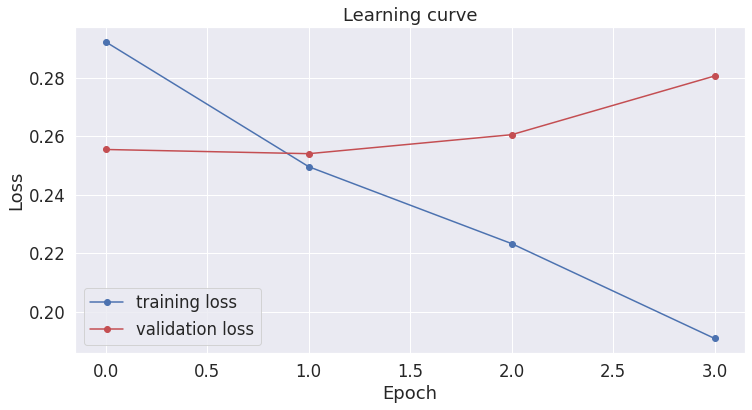

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o', label="training loss")
plt.plot(validation_loss_values, 'r-o', label="validation loss")

# Label the plot.
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [ ]:
# from google.colab import files
# import os
# bert_type="bert-large-cased"
# epochs=4
# output_dir = './newmodel_save_'+str(bert_type)+'_'+str(epochs)+'.pth'


In [ ]:
from google.colab import files
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 # bert_type="bert-large-cased"
# epochs=4
output_dir = 'train_eval_'+str(roberta_type)+'_'+str(epochs)+'_'+str(bs)+'_'+str(MAX_LEN)+'f1_'+str(score)+'.pth'

# model_save_name = 'classifier.pt'
path = F"drive/My Drive/{output_dir}"
torch.save(model.state_dict(), path)

In [ ]:
# Load a trained model and vocabulary that you have fine-tuned
# model = TheModelClass(*args, **kwargs)


# torch.save(model.state_dict(), output_dir)


In [ ]:
# files.download(str(output_dir))
Model=model

In [ ]:
model.load_state_dict(torch.load(path))
model.eval()

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), eps=1e-1

In [ ]:
test_sentence = "Disrespectful idiot. What is your fucking name bigot?"

test = test_sentence.split()
print(test)

# def tokenize_and_forsubword(sentence):
#     tokenized_sentence = []
#     is_subwords = []

#     i =0
#     for word in sentence:

#         # Tokenize the word and count # of subwords the word is broken into
#         tokenized_word = tokenizer.tokenize(word)
#         print(tokenized_word)
#         n_subwords = len(tokenized_word)

#         # Add the tokenized word to the final tokenized word list
#         tokenized_sentence.extend(tokenized_word)

#         # Add the same label to the new list of labels `n_subwords` times
#         is_subwords.extend([i] * n_subwords)
#         i=i+1
#     return tokenized_sentence, is_subwords

# idsss,is_subword = tokenize_and_forsubword(test)
# print(is_subword)
# print(idsss)

['Disrespectful', 'idiot.', 'What', 'is', 'your', 'fucking', 'name', 'bigot?']


In [ ]:
tokenizer.tokenize(test_sentence)

['Dis',
 'respect',
 'ful',
 'Ġidiot',
 '.',
 'ĠWhat',
 'Ġis',
 'Ġyour',
 'Ġfucking',
 'Ġname',
 'Ġbigot',
 '?']

In [ ]:
def tokenize_and_forsubword(sentence):
    tokenized_sentence = []
    is_subwords = []
    sentences = tokenizer.tokenize(sentence)
    print(sentences)
    i =0
    for word in sentence:

        # Tokenize the word and count # of subwords the word is broken into
        tokenized_word = tokenizer.tokenize(word)
        print(tokenized_word)
        n_subwords = len(tokenized_word)

        # Add the tokenized word to the final tokenized word list
        tokenized_sentence.extend(tokenized_word)

        # Add the same label to the new list of labels `n_subwords` times
        is_subwords.extend(i)
    return tokenized_sentence, is_subwords

idsss,is_subword = tokenize_and_forsubword(test)
print(is_subword)
print(idsss)

In [ ]:
# tokenizer.tokenize(test)

In [ ]:
tokenizer.tokenize(test_sentence)

['Dis',
 'respect',
 'ful',
 'Ġidiot',
 '.',
 'ĠWhat',
 'Ġis',
 'Ġyour',
 'Ġfucking',
 'Ġname',
 'Ġbigot',
 '?']

In [ ]:
idsss = tokenizer.tokenize(test_sentence)
numid = tokenizer.convert_tokens_to_ids(idsss)
# numid
numid.insert(0,0)
numid.append(2)

input_ids = torch.tensor([numid]).cuda()

In [ ]:
idsss

['Dis',
 'respect',
 'ful',
 'Ġidiot',
 '.',
 'ĠWhat',
 'Ġis',
 'Ġyour',
 'Ġfucking',
 'Ġname',
 'Ġbigot',
 '?']

In [ ]:
numid

[0, 26402, 27387, 2650, 30603, 4, 653, 16, 110, 23523, 766, 43853, 116, 2]

In [ ]:
input_ids

tensor([[26402, 27387,  2650, 30603,     4,   653,    16,   110, 23523,   766,
         43853,   116]], device='cuda:0')

In [ ]:
idsss = tokenizer.tokenize(test_sentence)
numid = tokenizer.convert_tokens_to_ids(idsss)
# numid
# numid.insert(0,0)
# numid.append(2)

input_ids = torch.tensor([numid]).cuda()

In [ ]:
with torch.no_grad():
    output = model(input_ids)

In [ ]:
np.argmax(output[0].to('cpu').numpy(), axis=2)

array([[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1]])

In [ ]:
tokens = tokenizer.tokenize(test_sentence)
numid = tokenizer.convert_tokens_to_ids(tokens)

# numid.insert(0,0)
# numid.append(2)

input_ids = torch.tensor([numid]).cuda()
############################################################
with torch.no_grad():
    output = model(input_ids)

label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)

# input_ids=input_ids[0][1:-1]
# label_indices = label_indices[0][1:-1]
input_ids=input_ids[0]
label_indices = label_indices[0]

print(input_ids)
print(label_indices)

tensor([26402, 27387,  2650, 30603,     4,   653,    16,   110, 23523,   766,
        43853,   116], device='cuda:0')
[1 1 1 0 1 1 1 1 0 1 1 1]


In [ ]:
# join bpe split tokens
# tokens = tokenizer.convert_ids_to_tokens(input_ids.to('cpu').numpy())
# print(tokens)
new_tokens, new_labels = [], [0]
# tokens=tokens[1:-1]
print(tokens)
span=[]

dist=0
j=0
for i in range(len(tokens)):
    # print(i)
#     # print(i,is_subword[i],j)
#     if is_subword[i]==j:
        if tokens[i].startswith("Ġ"):
            j=j+1
            dist=dist+1
            new_labels.append(tag_values[label_indices[i]])
            if label_indices[i]==0:
                span.extend(np.arange(dist,dist+len(tokens[i])-1,1))
            dist=dist+len(tokens[i])-1
        else:
            if label_indices[i]==0:
                span.extend(np.arange(dist,dist+len(tokens[i]),1))
            dist=dist+len(tokens[i])
print(span)
print(new_labels)
print(test_sentence)
    # print(i,is_subword[i],j)
    # if is_subword[i]==j:
    #     # if tokens[i].startswith("##"):
    #     #     new_tokens[is_subword[i]]=new_tokens[is_subword[i]]+tokens[i][2:]
    #     # else:
    #     new_tokens[is_subword[i]]=new_tokens[is_subword[i]]+tokens[i]
    #     if label_indices[i]==0:
    #         new_labels[is_subword[i]]= tag_values[0]
    # else :
    #     new_tokens.append(tokens[i])
    #     new_labels.append(tag_values[label_indices[i]])
    #     j=j+1

['Dis', 'respect', 'ful', 'Ġidiot', '.', 'ĠWhat', 'Ġis', 'Ġyour', 'Ġfucking', 'Ġname', 'Ġbigot', '?']
[14, 15, 16, 17, 18, 34, 35, 36, 37, 38, 39, 40]
[0, '1', '0', '0', '0', '1', '0', '0']
Disrespectful idiot. What is your fucking name bigot?


In [ ]:
for token, label in zip(test_sentence.split(), new_labels):
    print("{}\t{}".format(label, token))
print(span)

0	Disrespectful
1	idiot.
0	What
0	is
0	your
1	fucking
0	name
0	bigot?
[14, 15, 16, 17, 18, 34, 35, 36, 37, 38, 39, 40]


In [ ]:
def output_on_test(test_sentence):
    # test_sentence = "Because he's an i..diot w*ho i''s moron and has a big bigot qualityufuyfuyuvyuv."

    test = test_sentence.split()

    tokens = tokenizer.tokenize(test_sentence)
    numid = tokenizer.convert_tokens_to_ids(tokens)

    # numid.insert(0,0)
    # numid.append(2)

    input_ids = torch.tensor([numid]).cuda()
    ############################################################
    with torch.no_grad():
        output = model(input_ids)

    label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)

    # input_ids=input_ids[0][1:-1]
    # label_indices = label_indices[0][1:-1]
    input_ids=input_ids[0]
    label_indices = label_indices[0]

    # print(input_ids)
    # print(label_indices)
    new_tokens, new_labels = [], []

    span=[]

    dist=0
    j=0
    for i in range(len(tokens)):
        if tokens[i].startswith("Ġ"):
            j=j+1
            dist=dist+1
            new_labels.append(tag_values[label_indices[i]])
            if label_indices[i]==0:
                span.extend(np.arange(dist,dist+len(tokens[i])-1,1))
            dist=dist+len(tokens[i])-1
        else:
            if label_indices[i]==0:
                span.extend(np.arange(dist,dist+len(tokens[i]),1))
            dist=dist+len(tokens[i])
    # print(span)
    # print(new_labels)
    # print(test_sentence)
    return span

In [ ]:
testa=pd.read_csv("devfinal.csv", encoding="latin1").fillna(method="ffill")

In [ ]:
# test.head()
testa.head(5)

spans                                               text
0                              [0, 1, 2, 3, 4, 5, 6]  Fucking Leftist Hebes, always finding the dirt...
1                                   [62, 63, 64, 65]  Because 13 plants are DANGEROUS.  SMDH.\n\nGro...
2                       [28, 29, 30, 31, 32, 33, 34]  Their is so much additional garbage tagged on ...
3  [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 3...  Are there really enough red neck idiots in Was...
4  [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 2...  Good points.  A dumb crude guy in a dumb crude...

In [ ]:
testa
def testa_conv(a):
    return a
testa["in_text"] = testa.apply(lambda row:testa_conv(row.text), axis=1)

In [ ]:
# a,b=output_on_test(testa["in_text"][1])
testa["preds"]=testa.apply(lambda row:output_on_test(row.text), axis=1)
# print(a)
# print(b)

In [ ]:
testa

spans  ...                                              preds
0                                [0, 1, 2, 3, 4, 5, 6]  ...                              [0, 1, 2, 3, 4, 5, 6]
1                                     [62, 63, 64, 65]  ...  [46, 47, 48, 50, 51, 52, 53, 55, 56, 62, 63, 6...
2                         [28, 29, 30, 31, 32, 33, 34]  ...  [28, 29, 30, 31, 32, 33, 34, 143, 144, 145, 14...
3    [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 3...  ...                           [33, 34, 35, 36, 37, 38]
4    [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 2...  ...  [16, 17, 18, 19, 21, 22, 23, 24, 25, 36, 37, 3...
..                                                 ...  ...                                                ...
789                                   [58, 59, 60, 61]  ...                   [58, 59, 60, 61, 63, 64, 65, 66]
790                                                 []  ...                                                 []
791           [320, 321, 322, 323, 324, 325, 326, 327]  ...  [41, 42, 43, 44, 45, 46, 47, 48, 508, 509, 510...
792               [78, 79, 80, 81, 82, 83, 84, 85, 86]  ...  [0, 1, 2, 78, 79, 80, 81, 82, 83, 84, 85, 86, ...
793  [484, 485, 486, 487, 488, 522, 523, 524, 525, ...  ...  [124, 125, 126, 127, 135, 136, 137, 138, 139, ...

[794 rows x 4 columns]

In [ ]:
def output_on_test_position(test_sentence):
    # test_sentence = "Because he's an i..diot w*ho i''s moron and has a big bigot qualityufuyfuyuvyuv."
    test = test_sentence.split()

    tokens = tokenizer.tokenize(test_sentence)
    numid = tokenizer.convert_tokens_to_ids(tokens)

    # numid.insert(0,0)
    # numid.append(2)

    input_ids = torch.tensor([numid]).cuda()
    ############################################################
    with torch.no_grad():
        output = model(input_ids)

    label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)

    # input_ids=input_ids[0][1:-1]
    # label_indices = label_indices[0][1:-1]
    input_ids=input_ids[0]
    label_indices = label_indices[0]

    # print(input_ids)
    # print(label_indices)
    new_tokens, new_labels = [], [0]

    span=[]

    dist=0
    j=0
    for i in range(len(tokens)):
        if tokens[i].startswith("Ġ"):
            j=j+1
            dist=dist+1
            new_labels.append(tag_values[label_indices[i]])
            if label_indices[i]==0:
                span.extend(np.arange(dist,dist+len(tokens[i])-1,1))
            dist=dist+len(tokens[i])-1
        else:
            if label_indices[i]==0:
                new_labels[j]=1
                span.extend(np.arange(dist,dist+len(tokens[i]),1))
            dist=dist+len(tokens[i])
    # print(span)
    # print(new_labels)
    # print(test_sentence)
    return new_labels

In [ ]:
testa["predlabels"]=testa.apply(lambda row:output_on_test_position(row.text), axis=1)

In [ ]:
testa

spans  ...                                         predlabels
0                                [0, 1, 2, 3, 4, 5, 6]  ...      [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1                                     [62, 63, 64, 65]  ...         [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1]
2                         [28, 29, 30, 31, 32, 33, 34]  ...  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 3...  ...  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 2...  ...  [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...
..                                                 ...  ...                                                ...
789                                   [58, 59, 60, 61]  ...               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
790                                                 []  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
791           [320, 321, 322, 323, 324, 325, 326, 327]  ...  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
792               [78, 79, 80, 81, 82, 83, 84, 85, 86]  ...  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...
793  [484, 485, 486, 487, 488, 522, 523, 524, 525, ...  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

[794 rows x 5 columns]

In [ ]:
def strtointpart2(a):
  a=a[1:-1]
  if not a:
    return a
  s=(a.split(", "))
  # print(a)
  for i in range(len(s)):
    s[i]=int(s[i])
  return s

def f1(predictions, gold):
    """
    F1 (a.k.a. DICE) operating on two lists of offsets (e.g., character).
    >>> assert f1([0, 1, 4, 5], [0, 1, 6]) == 0.5714285714285714
    :param predictions: a list of predicted offsets
    :param gold: a list of offsets serving as the ground truth
    :return: a score between 0 and 1
    """
    if len(gold) == 0:
        return 1. if len(predictions) == 0 else 0.
    if len(predictions) == 0:
        return 0.
    # print(predictions)
    nom = 2*len(set(predictions).intersection(set(gold)))
    # print(nom)
    denom = len(set(predictions))+len(set(gold))
    return float(nom)/float(denom)

testa["f1_scores"] = testa.apply(lambda row: f1(row.preds, strtointpart2(row.spans)), axis=1)

a=[]
for i in testa.f1_scores:
    a.append(i)
print(a)

if not a:
    print("test bana lo bhaiyaa")
else:
    print(sum(a)/len(a))

score=sum(a)/len(a)
print(score)

In [ ]:
def strtointpart2(a):
  a=a[1:-1]
  if not a:
    return a
  s=(a.split(", "))
  # print(a)
  for i in range(len(s)):
    s[i]=int(s[i])
  return s


In [ ]:
def f1(predictions, gold):
    """
    F1 (a.k.a. DICE) operating on two lists of offsets (e.g., character).
    >>> assert f1([0, 1, 4, 5], [0, 1, 6]) == 0.5714285714285714
    :param predictions: a list of predicted offsets
    :param gold: a list of offsets serving as the ground truth
    :return: a score between 0 and 1
    """
    if len(gold) == 0:
        return 1. if len(predictions) == 0 else 0.
    if len(predictions) == 0:
        return 0.
    # print(predictions)
    nom = 2*len(set(predictions).intersection(set(gold)))
    # print(nom)
    denom = len(set(predictions))+len(set(gold))
    return float(nom)/float(denom)

In [ ]:
testa["f1_scores"] = testa.apply(lambda row: f1(row.preds, strtointpart2(row.spans)), axis=1)

In [ ]:
testa

spans  ... f1_scores
0                                [0, 1, 2, 3, 4, 5, 6]  ...  1.000000
1                                     [62, 63, 64, 65]  ...  0.242424
2                         [28, 29, 30, 31, 32, 33, 34]  ...  0.700000
3    [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 3...  ...  0.342857
4    [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 2...  ...  0.684211
..                                                 ...  ...       ...
789                                   [58, 59, 60, 61]  ...  0.666667
790                                                 []  ...  1.000000
791           [320, 321, 322, 323, 324, 325, 326, 327]  ...  0.000000
792               [78, 79, 80, 81, 82, 83, 84, 85, 86]  ...  0.400000
793  [484, 485, 486, 487, 488, 522, 523, 524, 525, ...  ...  0.000000

[794 rows x 6 columns]

In [ ]:
a=[]
for i in testa.f1_scores:
    a.append(i)
print(a)

if not a:
    print("test bana lo bhaiyaa")
else:
    print(sum(a)/len(a))

[1.0, 0.24242424242424243, 0.7, 0.34285714285714286, 0.6842105263157895, 0.0, 0.0, 0.9411764705882353, 0.1702127659574468, 0.0, 1.0, 0.0, 0.14634146341463414, 0.6153846153846154, 1.0, 0.75, 0.5714285714285714, 0.9230769230769231, 0.2857142857142857, 1.0, 0.0, 0.14545454545454545, 1.0, 0.8888888888888888, 1.0, 0.5454545454545454, 0.0, 0.0, 1.0, 0.26229508196721313, 0.6086956521739131, 1.0, 0.0, 0.6666666666666666, 0.5151515151515151, 0.8, 0.25, 0.0, 0.37209302325581395, 0.5384615384615384, 0.5333333333333333, 0.8888888888888888, 0.9230769230769231, 0.9090909090909091, 0.0, 0.0, 1.0, 0.15827338129496402, 0.5185185185185185, 0.2, 0.6666666666666666, 1.0, 0.15, 0.9411764705882353, 0.5882352941176471, 0.0, 0.3524229074889868, 0.9523809523809523, 0.2857142857142857, 0.35294117647058826, 0.0, 1.0, 0.0, 0.38596491228070173, 0.8888888888888888, 0.43478260869565216, 0.0, 1.0, 0.0, 0.0, 0.875, 0.625, 0.0, 0.5333333333333333, 0.0, 0.0, 0.47619047619047616, 0.7878787878787878, 0.0, 0.0, 0.0, 0.8888

In [ ]:
score=sum(a)/len(a)
score

0.5043727659387206

In [ ]:
output_dir[:-4]

'train_eval_bert-large-cased_4_32_100f1_0.5642318060183463'

In [ ]:
testa.to_csv(str(output_dir[:-4])+".csv")

In [ ]:
torch.cuda.empty_cache()

In [ ]:
# def output_on_test(test_sentence):
#     # test_sentence = "Because he's an i..diot w*ho i''s moron and has a big bigot qualityufuyfuyuvyuv."

#     test = test_sentence.split()
#     # print(test)
#     tokens,is_subword = tokenize_and_forsubword(test_sentence)

#     idsss = tokenizer.tokenize(test_sentence)
#     numid = tokenizer.convert_tokens_to_ids(idsss)
#     numid.insert(0,101)
#     numid.append(102)

#     input_ids = torch.tensor([numid]).cuda()
#     with torch.no_grad():
#         output = model(input_ids)
#     label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)

#     input_ids=input_ids[0][1:-1]
#     label_indices = label_indices[0][1:-1]

#     tokens = tokenizer.convert_ids_to_tokens(input_ids.to('cpu').numpy())
#     # print(tokens)
#     new_tokens, new_labels = [], []

#     j=-1
#     for i in range(len(is_subword)):

#         # print(i,is_subword[i],j)
#         if is_subword[i]==j:
#             if tokens[i].startswith("##"):
#                 new_tokens[is_subword[i]]=new_tokens[is_subword[i]]+tokens[i][2:]
#             else:
#                 new_tokens[is_subword[i]]=new_tokens[is_subword[i]]+tokens[i]
#             if label_indices[i]==0:
#                 new_labels[is_subword[i]]= tag_values[0]
#         else :
#             new_tokens.append(tokens[i])
#             new_labels.append(tag_values[label_indices[i]])
#             j=j+1
#     span = []
#     start=0
#     for token, label in zip(new_tokens, new_labels):
#         if label=='1':
#             span.extend(np.arange(start,start+len(token),1))
#         start=start+len(token)+1
#     # print(span)
#     return span

In [ ]:
pd.set_option('max_rows',None)
pd.set_option('max_columns',None)
pd.set_option('max_colwidth', None)
testa

spans  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
# b=[0.4444444444444444, 0.0, 0.64, 0.9230769230769231, 0.8888888888888888, 0.9230769230769231, 0.9230769230769231, 1.0, 0.9473684210526315, 0.0, 1.0, 0.0, 0.0, 0.42857142857142855, 0.0, 0.631578947368421, 0.6829268292682927, 0.0, 0.0, 0.5882352941176471, 0.9230769230769231, 0.9230769230769231, 0.1282051282051282, 0.9166666666666666, 0.0, 0.0, 0.6666666666666666, 0.37209302325581395, 0.9565217391304348, 0.43478260869565216, 0.3076923076923077, 0.0, 0.0, 0.9230769230769231, 1.0, 0.4375, 0.6896551724137931, 0.5555555555555556, 0.6341463414634146, 1.0, 0.0, 0.9090909090909091, 0.8888888888888888, 1.0, 0.075, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.7272727272727273, 0.3333333333333333, 0.7692307692307693, 0.0, 0.5333333333333333, 0.0, 1.0, 0.6363636363636364, 1.0, 1.0, 0.631578947368421, 1.0, 1.0, 0.12075471698113208, 1.0, 0.5454545454545454, 0.0, 0.9230769230769231, 0.7692307692307693, 1.0, 1.0, 1.0, 0.5753424657534246, 0.9230769230769231, 0.7407407407407407, 0.2857142857142857, 0.9473684210526315, 0.375, 0.45454545454545453, 0.0, 0.9230769230769231, 0.32786885245901637, 0.0, 0.0, 0.5454545454545454, 0.9565217391304348, 0.0, 0.9230769230769231, 0.9523809523809523, 0.0, 0.46153846153846156, 0.75, 0.20408163265306123, 0.0, 1.0, 0.0, 0.18627450980392157, 0.0, 0.391304347826087, 0.0, 0.0, 0.0, 0.0, 0.6666666666666666, 0.4166666666666667, 0.6666666666666666, 0.039603960396039604, 0.0, 0.85, 0.0, 0.3448275862068966, 0.9523809523809523, 0.4, 0.5, 0.0, 0.0, 0.6666666666666666, 0.5641025641025641, 0.27450980392156865, 0.7058823529411765, 0.8333333333333334, 0.4583333333333333, 0.0, 0.0, 0.9411764705882353, 0.9230769230769231, 0.5384615384615384, 1.0, 0.0, 0.0, 0.5, 0.6808510638297872, 0.9090909090909091, 0.0, 0.6153846153846154, 0.18181818181818182, 0.0, 0.3333333333333333, 0.6666666666666666, 0.5806451612903226, 0.5263157894736842, 0.5, 1.0, 0.0, 0.782608695652174, 0.0, 0.9411764705882353, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.5714285714285714, 0.41379310344827586, 0.56, 1.0, 0.8571428571428571, 0.0, 0.0, 1.0, 0.6666666666666666, 0.8235294117647058, 1.0, 0.8421052631578947, 0.9444444444444444, 0.6666666666666666, 0.4827586206896552, 0.8695652173913043, 0.0, 0.6, 0.0, 0.0, 0.5714285714285714, 0.34782608695652173, 0.5714285714285714, 0.5263157894736842, 0.0, 0.6666666666666666, 0.5333333333333333, 1.0, 0.5882352941176471, 0.9230769230769231, 0.0, 0.4444444444444444, 0.631578947368421, 0.9230769230769231, 0.6764705882352942, 1.0, 0.56, 0.9523809523809523, 0.0, 0.0, 0.0, 0.5555555555555556, 0.625, 0.6956521739130435, 0.8484848484848485, 0.0, 0.9473684210526315, 0.631578947368421, 0.0, 0.0, 0.0, 0.6666666666666666, 0.8235294117647058, 0.875, 0.875, 0.39215686274509803, 0.9230769230769231, 0.7619047619047619, 0.0, 0.9090909090909091, 0.9090909090909091, 0.5, 0.4375, 1.0, 0.9230769230769231, 0.8235294117647058, 0.4, 0.0, 0.0, 0.0, 0.631578947368421, 0.47058823529411764, 0.75, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6956521739130435, 0.0, 0.0, 0.9230769230769231, 0.7142857142857143, 0.9090909090909091, 0.8, 0.16666666666666666, 0.0, 0.5454545454545454, 0.22727272727272727, 0.07407407407407407, 0.5333333333333333, 0.9090909090909091, 0.8333333333333334, 0.5714285714285714, 0.3225806451612903, 1.0, 0.9230769230769231, 0.6153846153846154, 0.6153846153846154, 0.0, 0.0, 0.6666666666666666, 0.0, 0.5, 0.7692307692307693, 0.4090909090909091, 0.6956521739130435, 0.0, 0.7368421052631579, 0.9090909090909091, 0.0, 0.6666666666666666, 0.5454545454545454, 0.6666666666666666, 0.0, 0.0, 0.9411764705882353, 1.0, 0.0, 0.9166666666666666, 0.0, 0.5714285714285714, 0.5333333333333333, 1.0, 0.25, 0.6666666666666666, 0.0, 0.75, 0.21875, 1.0, 0.8333333333333334, 0.8235294117647058, 0.125, 0.9090909090909091, 0.967741935483871, 0.5263157894736842, 0.0, 0.5263157894736842, 0.46153846153846156, 0.25806451612903225, 0.5882352941176471, 1.0, 0.0, 0.5263157894736842, 0.0, 0.5714285714285714, 0.4444444444444444, 1.0, 0.5, 1.0, 0.0, 0.0, 0.0, 0.0, 0.4727272727272727, 1.0, 0.9473684210526315, 0.3181818181818182, 1.0, 0.0, 1.0, 0.36, 0.7368421052631579, 1.0, 0.4266666666666667, 0.0, 0.8888888888888888, 0.42857142857142855, 0.631578947368421, 1.0, 0.0, 0.2727272727272727, 1.0, 0.4117647058823529, 0.0, 0.0, 0.42857142857142855, 1.0, 0.8125, 1.0, 0.0, 0.0, 1.0, 1.0, 0.32, 1.0, 0.0, 0.5217391304347826, 0.38461538461538464, 0.9090909090909091, 0.9629629629629629, 0.0, 0.0, 0.9090909090909091, 0.0, 0.0, 0.9090909090909091, 0.3333333333333333, 0.8, 0.6666666666666666, 1.0, 0.8333333333333334, 0.45454545454545453, 0.7368421052631579, 0.5714285714285714, 0.1111111111111111, 0.48484848484848486, 0.7142857142857143, 0.8571428571428571, 1.0, 0.0, 0.0, 1.0, 0.9230769230769231, 0.782608695652174, 0.0, 1.0, 1.0, 0.0, 0.0, 0.9090909090909091, 1.0, 0.0, 1.0, 0.72, 0.0, 0.0, 0.0, 0.7333333333333333, 0.0, 0.64, 0.8333333333333334, 0.0, 1.0, 0.0, 0.9230769230769231, 0.875, 0.0, 0.7619047619047619, 0.32, 0.9230769230769231, 1.0, 0.9230769230769231, 0.0, 0.9565217391304348, 0.625, 0.47058823529411764, 0.5714285714285714, 0.6666666666666666, 0.0, 0.5217391304347826, 0.13793103448275862, 0.9411764705882353, 0.625, 0.625, 0.9090909090909091, 0.7857142857142857, 0.47058823529411764, 0.32432432432432434, 0.5116279069767442, 0.6666666666666666, 0.5714285714285714, 0.8695652173913043, 1.0, 1.0, 0.43478260869565216, 0.6666666666666666, 0.0, 0.0, 0.6666666666666666, 0.9230769230769231, 1.0, 0.0, 0.5714285714285714, 0.0, 0.9411764705882353, 1.0, 1.0, 0.4745762711864407, 0.8, 0.42105263157894735, 1.0, 0.6896551724137931, 1.0, 0.0, 0.6206896551724138, 0.0, 1.0, 0.0, 0.8888888888888888, 0.9411764705882353, 0.12962962962962962, 0.0, 0.32941176470588235, 0.0, 0.0, 0.5, 0.5555555555555556, 0.0, 0.0, 0.0, 0.375, 0.6666666666666666, 0.0, 0.72, 1.0, 0.9230769230769231, 0.9230769230769231, 0.75, 0.0, 0.7586206896551724, 0.0, 0.7586206896551724, 0.0, 0.0, 0.7692307692307693, 0.75, 0.0, 0.6, 0.0, 0.0, 1.0, 1.0, 1.0, 0.9333333333333333, 1.0, 0.9473684210526315, 0.0, 1.0, 0.5833333333333334, 0.5555555555555556, 1.0, 0.7, 0.7142857142857143, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.9230769230769231, 0.6153846153846154, 0.0, 0.631578947368421, 0.2222222222222222, 0.8888888888888888, 0.22535211267605634, 0.9090909090909091, 0.0, 0.0, 0.3, 0.625, 0.0, 0.0, 0.47058823529411764, 0.75, 0.9285714285714286, 1.0, 0.5714285714285714, 1.0, 0.0, 0.42105263157894735, 0.9333333333333333, 0.6666666666666666, 0.6666666666666666, 0.0, 0.0, 0.3076923076923077, 0.4, 0.7692307692307693, 0.42857142857142855, 0.631578947368421, 0.0, 0.5, 0.2608695652173913, 0.0, 0.4897959183673469, 1.0, 0.9090909090909091, 0.0, 0.5, 0.8333333333333334, 0.6153846153846154, 0.9090909090909091, 0.6666666666666666, 0.5714285714285714, 1.0, 1.0, 0.5555555555555556, 0.0, 0.05343511450381679, 0.36363636363636365, 0.9655172413793104, 0.7692307692307693, 0.9090909090909091, 0.9523809523809523, 0.0, 0.9230769230769231, 0.75, 0.0, 1.0, 1.0, 0.4166666666666667, 0.0, 0.0, 1.0, 0.0, 0.5714285714285714, 1.0, 0.5714285714285714, 0.0, 0.0, 0.9230769230769231, 0.5, 0.6666666666666666, 0.41025641025641024, 0.0, 0.9230769230769231, 0.6666666666666666, 1.0, 1.0, 0.0, 0.6666666666666666, 0.9090909090909091, 0.6666666666666666, 0.6666666666666666, 0.0, 0.0, 0.7058823529411765, 0.1951219512195122, 0.0, 0.5333333333333333, 0.4444444444444444, 0.4444444444444444, 1.0, 0.75, 0.06486486486486487, 1.0, 0.6947368421052632, 0.4166666666666667, 0.0, 1.0, 0.0, 0.625, 0.0, 0.3225806451612903, 0.5714285714285714, 0.7142857142857143, 0.9, 0.0, 0.9230769230769231, 1.0, 0.0, 1.0, 1.0, 0.08571428571428572, 0.0, 0.55, 0.0, 0.0, 1.0, 0.0, 0.75, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9090909090909091, 0.0, 0.5517241379310345, 0.631578947368421, 0.8888888888888888, 0.6666666666666666, 0.0, 0.0, 0.0, 0.6111111111111112, 0.0, 0.8, 0.9230769230769231, 0.5, 0.9230769230769231, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.38596491228070173, 0.19047619047619047, 0.625, 1.0, 0.5263157894736842, 0.9523809523809523, 1.0, 0.8648648648648649, 0.5, 1.0, 0.5555555555555556, 0.24, 0.0, 1.0, 0.38461538461538464, 1.0, 0.7619047619047619, 0.0, 0.0, 0.0, 0.6, 0.47058823529411764, 0.0, 0.0, 0.0, 0.0, 0.9230769230769231, 1.0, 0.8421052631578947, 0.7777777777777778, 0.0, 0.7692307692307693, 0.0, 0.0, 0.5882352941176471, 1.0, 0.6956521739130435, 0.0, 0.0, 0.6956521739130435, 0.7692307692307693, 0.0, 0.37037037037037035, 0.9090909090909091, 0.9411764705882353, 0.42105263157894735, 0.7619047619047619, 1.0, 0.3125, 0.5, 0.3225806451612903, 1.0, 0.0, 0.9411764705882353, 0.6666666666666666, 0.0, 0.8, 0.0, 0.8, 0.0, 1.0, 0.0, 0.0, 0.0, 0.9473684210526315, 0.0, 0.3333333333333333, 0.9090909090909091, 0.6153846153846154, 0.8888888888888888, 1.0, 1.0, 0.8717948717948718, 0.95, 0.0, 0.5, 1.0, 1.0, 0.9230769230769231, 0.5333333333333333, 0.47619047619047616, 0.47058823529411764, 1.0, 0.9, 0.0, 0.0, 0.5833333333333334, 0.37037037037037035, 0.6194690265486725, 0.9230769230769231, 0.25, 1.0, 0.0, 0.0, 1.0]


In [ ]:
# for i in b:
#     print(i)